In [1]:
from pathlib import Path
import numpy as np
from ase.calculators.emt import EMT
from hilde.parsers import read_structure, read_output
from hilde.phonopy import phono as ph
from hilde.helpers.brillouinzone import get_paths, get_bands_and_labels, get_cellinfo, bandpath
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
atoms = read_structure('../Al.in')
vol = atoms.get_volume()

In [3]:
smatrix = 2*np.array([[-1,  1,  1],
                      [ 1, -1,  1],
                      [ 1,  1, -1]])

In [4]:
help(ph.preprocess)

Help on function preprocess in module hilde.phonopy.phono:

preprocess(atoms, supercell_matrix, disp=0.01, symprec=1e-05, trigonal=False)
    Creates a phonopy object from given input
    Args:
        atoms: atoms object that represents the (primitive) unit cell
        supercell_matrix: supercell matrix
        disp: displacement for the finite displacemt
    
    Returns:
        namedtuple with the phonon object, the supercell
        and the supercells_with_displacements as ase.atoms



In [5]:
phonon, sc, scs = ph.preprocess(atoms, smatrix)
phonon, sc, scs

(<phonopy.api_phonopy.Phonopy at 0x14b2ac79a390>,
 pAtoms(symbols='Al32', pbc=True, cell=[8.094531999999997, 8.094531999999997, 8.094531999999997]),
 [pAtoms(symbols='Al32', pbc=True, cell=[8.094531999999997, 8.094531999999997, 8.094531999999997])])

In [6]:
# Define working directory and create it
workdir = Path('./Si_{}{}{}_{}{}{}_{}{}{}_{:.3f}'.format(*smatrix.flatten(), vol))
workdir.mkdir(exist_ok=True)

In [7]:
# Compute and collect the forces
force_sets = []
calc = EMT()
for scell in scs:
    scell.calc = calc
    forces = scell.get_forces()
    force_sets.append(forces)

In [8]:
phonon.produce_force_constants(force_sets)

True

In [9]:
dos = ph.get_dos(phonon=phonon)

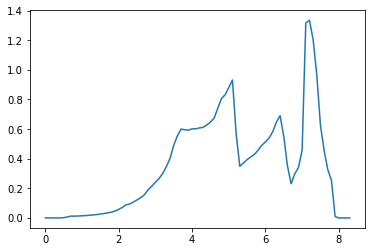

In [10]:
plt.plot(dos[0], dos[1])

In [11]:
cellinfo = get_cellinfo(atoms.cell)
cellinfo.special_points

{'G': array([0, 0, 0]),
 'K': array([0.375, 0.375, 0.75 ]),
 'L': array([0.5, 0.5, 0.5]),
 'U': array([0.625, 0.25 , 0.625]),
 'W': array([0.5 , 0.25, 0.75]),
 'X': array([0.5, 0. , 0.5])}

In [12]:
get_paths(atoms)

['GXWKGLUWLK', 'UX']

In [13]:
bands, labels = get_bands_and_labels(atoms, paths=['GXWGL'], latex=False)
labels

['G', 'X', 'W', 'G', 'L']

<module 'matplotlib.pyplot' from '/home/knoop/local/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

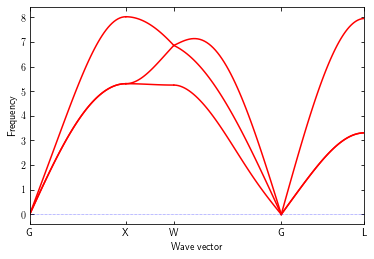

In [14]:
phonon.set_band_structure(bands)
phonon.plot_band_structure(labels=labels)
# for testing, don't use latex
# phonon.plot_band_structure()

In [15]:
qp, dd, fr, ev, ls = ph.get_bandstructure(phonon)

In [16]:
assert 7 < np.max(fr) < 10